In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.rand(100,1) - 0.5
y = 3*x[:,0]**2 + 0.05*np.random.randn(100)

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame()

In [5]:
df['x'] = x.reshape(100)
df['y'] = y

In [6]:
df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


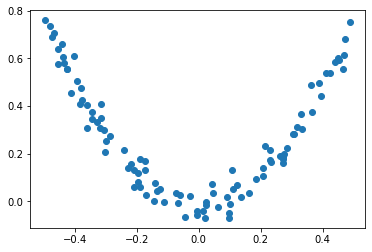

In [7]:
plt.scatter(df['x'],df['y'])

In [8]:
df['pred1'] = df['y'].mean()

In [9]:
df

,x,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [10]:
df['res1'] = df['y'] - df['pred1']

In [11]:
df

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


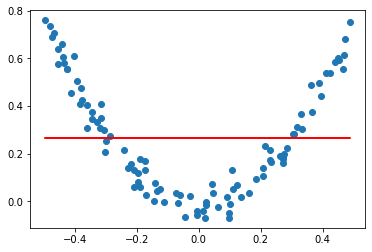

In [12]:
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['pred1'],color='red')

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['x'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

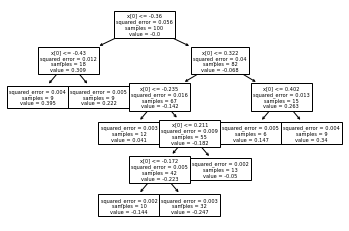

In [15]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [16]:
# Generating x_test
x_test = np.linspace(-0.5,0.5,500)

In [17]:
y_pred = 0.265458 + tree1.predict(x_test.reshape(500,1))

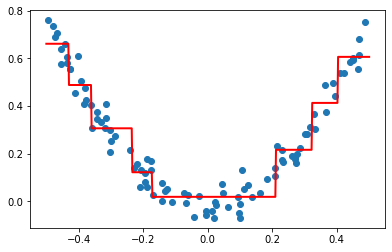

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test,y_pred,linewidth=2,color='red')
plt.scatter(df['x'],df['y'])

In [19]:
 df['pred2'] = 0.265458 + tree1.predict(df['x'].values.reshape(100,1))

In [20]:
df

,x,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [21]:
df['res2'] = df['y']-df['pred2']

In [22]:
df

,x,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [23]:
 tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [24]:
tree2.fit(df['x'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
y_pred = 0.265458 + sum(regressor.predict(x_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'x vs y')

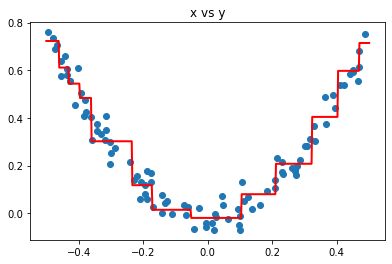

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test,y_pred,linewidth=2,color='red')
plt.scatter(df['x'],df['y'])
plt.title('x vs y')

# Gradient Boosting Regressor

In [27]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=1000,n_features=10,n_informative=5,random_state=1)
print(x.shape,y.shape)

(1000, 10) (1000,)


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,RepeatedKFold
from matplotlib import pyplot

In [29]:
model = GradientBoostingRegressor()

In [30]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [31]:
r2_score = np.mean(cross_val_score(model,x,y,scoring='r2',cv=cv,n_jobs=-1))

In [32]:
r2_score

0.984710766794305

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
model = GradientBoostingRegressor()

In [36]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [37]:
y_pred = model.predict(x_test)

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_pred,y_test)

0.9831147200330022

# Gradient Boosting Classifier

In [40]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000,n_features=10,n_informative=5,n_redundant=5,random_state=1)
print(x.shape,y.shape)

(1000, 10) (1000,)


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold

In [45]:
model = GradientBoostingClassifier()

In [46]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [48]:
np.mean(cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise'))

0.9156666666666669

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [53]:
model = GradientBoostingClassifier()

In [54]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [55]:
y_pred = model.predict(x_test)

In [56]:
accuracy_score(y_pred,y_test)

0.915